In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/regression/diamond_pricing.csv'
df = pd.read_csv(url)
df.head()

,Paleonium,Pressure,Price
0,17,6567,2810.280298
1,59,5253,1986.967089
2,123,9715,2083.132087
3,182,2073,2236.340285
4,133,6400,1903.323339


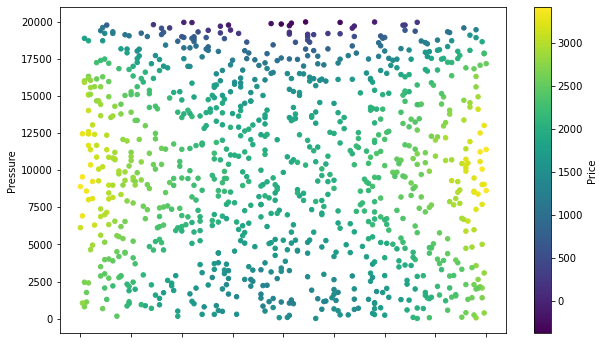

In [7]:
df.plot(kind='scatter', x='Paleonium',y='Pressure',c='Price',cmap='viridis',figsize=(10,6))
plt.show()

In [3]:
df.corr()

,Paleonium,Pressure,Price
Paleonium,1.000000,-0.046403,-0.018509
Pressure,-0.046403,1.000000,-0.304064
Price,-0.018509,-0.304064,1.000000


<AxesSubplot:>

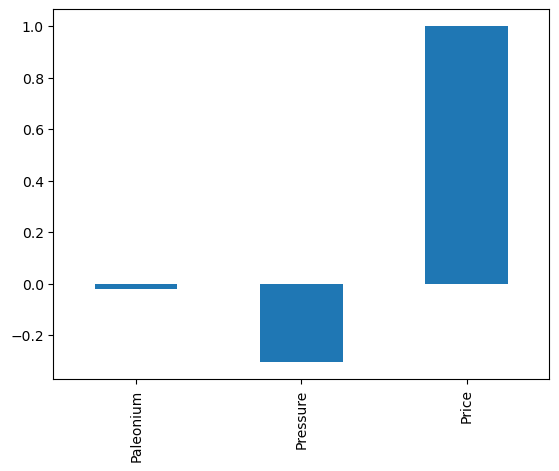

In [4]:
df.corrwith(df['Price']).plot(kind='bar')

# simple implementation

In [5]:
x = df.drop('Price',axis=1).values
x
y = df["Price"].values


In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.25, random_state=0)

In [7]:
df

,Paleonium,Pressure,Price
0,17,6567,2810.280298
1,59,5253,1986.967089
2,123,9715,2083.132087
3,182,2073,2236.340285
4,133,6400,1903.323339
...,...,...,...
995,90,15039,1633.608018
996,49,10592,2316.189728
997,42,18435,1189.359047
998,10,13675,2922.682785


In [8]:
model = make_pipeline(StandardScaler(),DecisionTreeRegressor())

In [9]:
model.fit(xtrain, ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [10]:
model.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('decisiontreeregressor', DecisionTreeRegressor())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'decisiontreeregressor': DecisionTreeRegressor(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'decisiontreeregressor__ccp_alpha': 0.0,
 'decisiontreeregressor__criterion': 'squared_error',
 'decisiontreeregressor__max_depth': None,
 'decisiontreeregressor__max_features': None,
 'decisiontreeregressor__max_leaf_nodes': None,
 'decisiontreeregressor__min_impurity_decrease': 0.0,
 'decisiontreeregressor__min_samples_leaf': 1,
 'decisiontreeregressor__min_samples_split': 2,
 'decisiontreeregressor__min_weight_fraction_leaf': 0.0,
 'decisiontreeregressor__random_state': None,
 'decisiontreeregressor__splitter': 'best'}

In [11]:
print("Testing Metrics")
ypred = model.predict(xtest)
ypred = model.predict(xtest)
print(f'score : {r2_score(ytest, ypred):.4}')
print(f'mse : {mean_squared_error(ytest, ypred):.4}')
print(f'mae : {mean_absolute_error(ytest, ypred):.4}')


Testing Metrics
score : 0.9575
mse : 1.803e+04
mae : 101.2


In [12]:
print("Training Metrics")
ypred = model.predict(xtrain)
print(f'score : {r2_score(ytrain, ypred):.4}')
print(f'mse : {mean_squared_error(ytrain, ypred):.4}')
print(f'mae : {mean_absolute_error(ytrain, ypred):.4}')


Training Metrics
score : 1.0
mse : 0.0
mae : 0.0


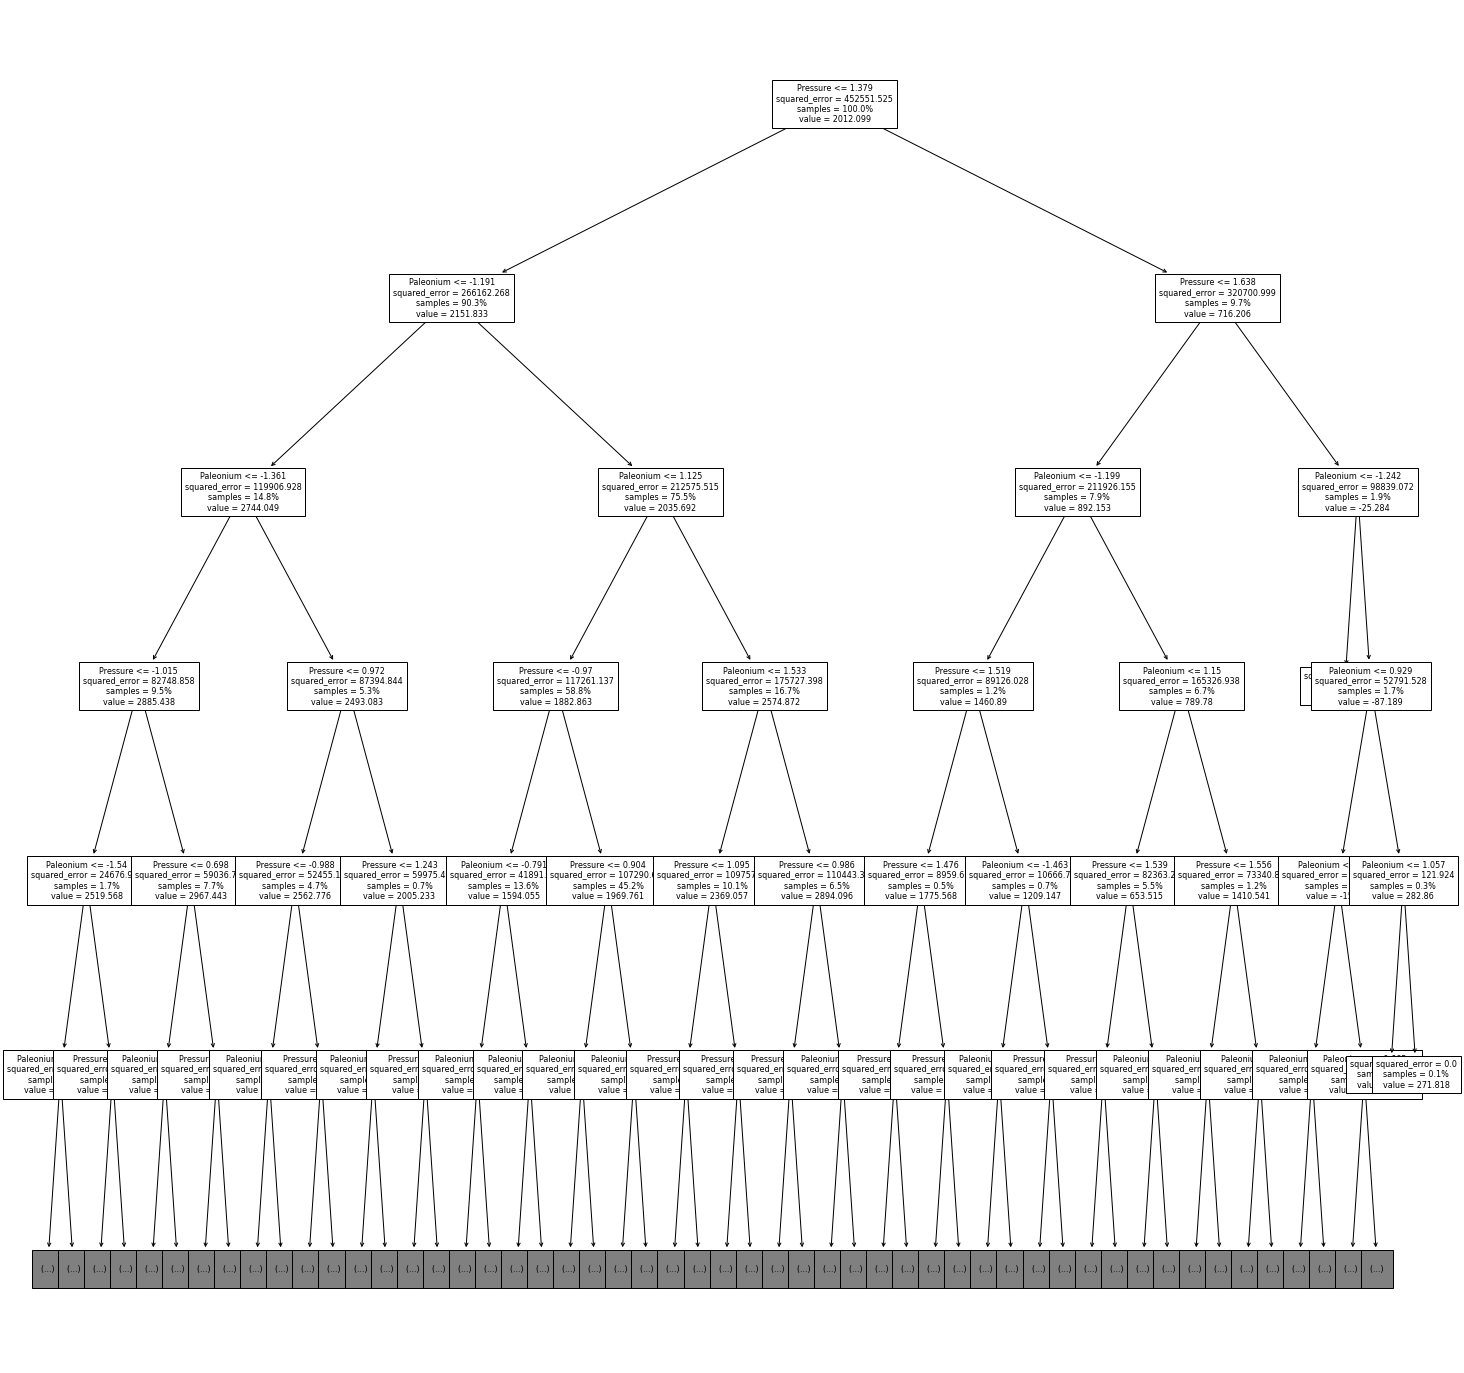

In [18]:
plt.figure(figsize=(25,25))
plot_tree(model.get_params()['decisiontreeregressor'],
            max_depth=5, 
            feature_names=['Paleonium','Pressure'], 
            fontsize=8, proportion=True)
plt.show()

# cross validate

In [13]:
ss = ShuffleSplit(n_splits=10, test_size=.25)
model = make_pipeline(StandardScaler(),DecisionTreeRegressor())


In [14]:
result = cross_validate(model, x, y, cv=ss,
                        scoring=['neg_mean_absolute_error','r2'],
                        return_train_score = True,
                        return_estimator = True)
result = pd.DataFrame(result)
result['test_error'] = -result['test_neg_mean_absolute_error']
result['train_error'] = -result['train_neg_mean_absolute_error']
result

,fit_time,score_time,estimator,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_r2,train_r2,test_error,train_error
0,0.003985,0.001995,"(StandardScaler(), DecisionTreeRegressor())",-101.548885,-0.0,0.952688,1.0,101.548885,0.0
1,0.008877,0.005008,"(StandardScaler(), DecisionTreeRegressor())",-95.085835,-0.0,0.963241,1.0,95.085835,0.0
2,0.004264,0.000998,"(StandardScaler(), DecisionTreeRegressor())",-102.487557,-0.0,0.955561,1.0,102.487557,0.0
3,0.002984,0.002995,"(StandardScaler(), DecisionTreeRegressor())",-104.948520,-0.0,0.962371,1.0,104.948520,0.0
4,0.007966,0.002982,"(StandardScaler(), DecisionTreeRegressor())",-98.862670,-0.0,0.953552,1.0,98.862670,0.0
5,0.004982,0.000999,"(StandardScaler(), DecisionTreeRegressor())",-96.234960,-0.0,0.967397,1.0,96.234960,0.0
6,0.005981,0.020937,"(StandardScaler(), DecisionTreeRegressor())",-88.244073,-0.0,0.968742,1.0,88.244073,0.0
7,0.003987,0.000997,"(StandardScaler(), DecisionTreeRegressor())",-104.848853,-0.0,0.960004,1.0,104.848853,0.0
8,0.003987,0.001995,"(StandardScaler(), DecisionTreeRegressor())",-97.931328,-0.0,0.962379,1.0,97.931328,0.0
9,0.005980,0.000996,"(StandardScaler(), DecisionTreeRegressor())",-100.066235,-0.0,0.961494,1.0,100.066235,0.0


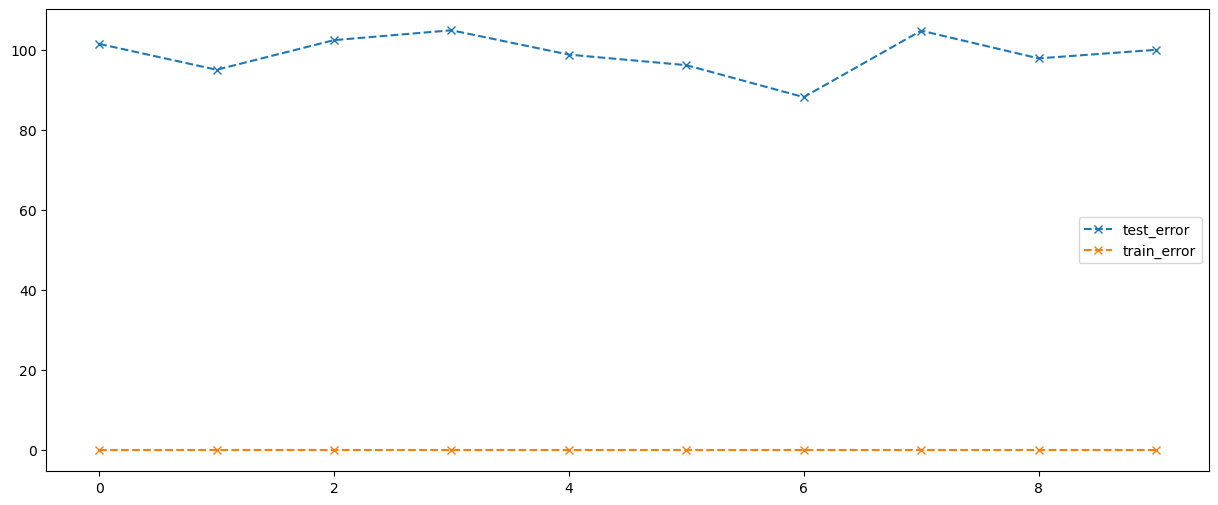

In [15]:
fig, ax = plt.subplots(figsize=(15,6))
result.plot(kind='line',y='test_error',ax=ax, style='--x')
result.plot(kind='line',y='train_error',ax=ax, style='--x')
plt.show()

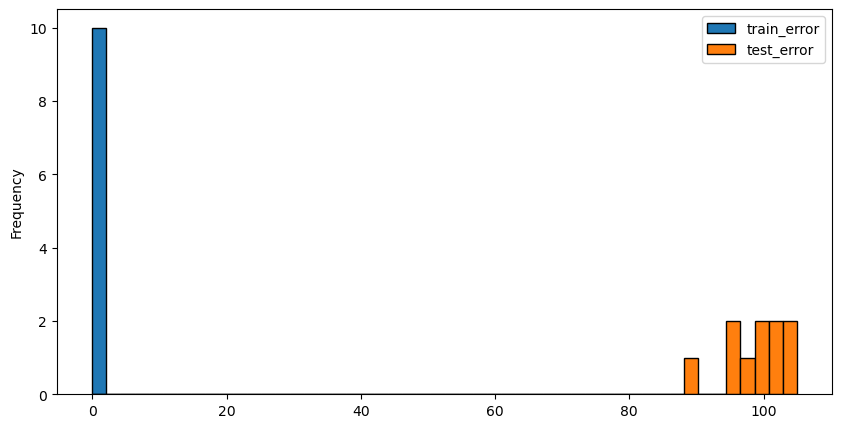

In [16]:
fig, ax = plt.subplots(figsize=(10,5))
result[['train_error','test_error']].plot(kind='hist',bins=50,ax=ax,edgecolor='black')
plt.show()

In [17]:
df

,Paleonium,Pressure,Price
0,17,6567,2810.280298
1,59,5253,1986.967089
2,123,9715,2083.132087
3,182,2073,2236.340285
4,133,6400,1903.323339
...,...,...,...
995,90,15039,1633.608018
996,49,10592,2316.189728
997,42,18435,1189.359047
998,10,13675,2922.682785


In [18]:
from sklearn.model_selection import validation_curve

In [19]:
max_depth_option = [5,10,15,25,50,100]
train_scores, test_scores = validation_curve(model,x,y,param_name='decisiontreeregressor__max_depth',
                            param_range=max_depth_option,
                            cv=ss,
                            scoring='neg_mean_absolute_error',
                            n_jobs=2)
train_errors, test_errors = -train_scores, -test_scores

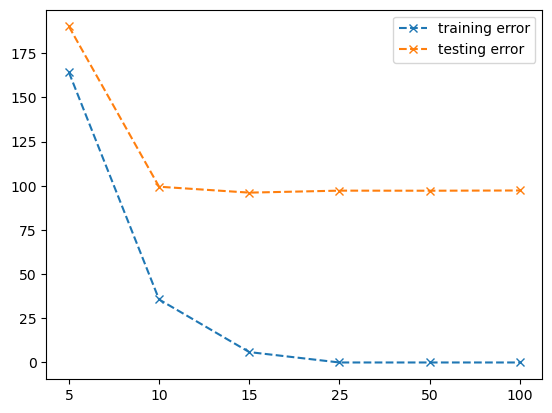

In [20]:
plt.plot(train_errors.mean(axis=1),'--x', label='training error')
plt.plot(test_errors.mean(axis=1),'--x', label='testing error')
plt.xticks([0,1,2,3,4,5],max_depth_option)
plt.legend()
plt.show()